# IMPORTED LIBRARY'S

In [1]:
# library to handle data in a vectorized manner
import numpy as np 

# library for data analsysis
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# library to handle JSON files
import json 

# uncomment this line if you haven't completed the Foursquare API lab
# convert an address into latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# uncomment this line if you haven't completed the Foursquare API lab
# map rendering library
!conda install -c conda-forge folium=0.5.0 --yes 
!conda install -c conda-forge gmaps
import folium 

# import scraper BeautifulSoup
from bs4 import BeautifulSoup
import requests

#print commment that requested libararies are imported
print('Libraries imported.')

Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
geopy                     1.18.1                     py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /opt/conda/envs/DSX-Python35:
#
folium                    0.5.0                      py_0    conda-forge
Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following NEW packages will be INSTALLED:

    geojson: 2.4.1-py_0 conda-forge
    gmaps:   0.8.4-py_0 conda-forge

geojson-2.4.1- 100% |################################| Time: 0:00:00  15.91 MB/s
gmaps-0.8.4-py 100% |################################| Time: 0:00:00  15.27 MB/s
Libraries imported.


## CODE | DATA VISUALIZATION#
### Collecting/Data Wrangling 
#### Key Areas of Economic, Diversity, Health & Safety, Education, and Living in the City of Keego Harbor, MI.

## Economic Data

In [4]:
# Imported Library and Economic Information provided by DataUSA.oi
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_aae71b9bff024ad18b0f2243ce422e44 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6n2nzQWovlUypKOgphORcI1JWLZJ2QOxFHpqzrE1J4rn',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Employee by Industry.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Year,Industry Name,Location,Number of Employees
0,2014,Accommodation & Food Service,Keego Harbor,271
1,2014,"Admin., Support, Waste Management Services",Keego Harbor,98
2,2014,"Agriculture, Forestry, Fishing, Hunting",Keego Harbor,14
3,2014,Construction,Keego Harbor,89
4,2014,Educational Services,Keego Harbor,53


In [5]:
# import library for Seaborn
import seaborn as sns

# Boxplot for the "Number of Employees and Industy Name"
sns.boxplot(x="Number of Employees", y="Industry Name", data=df_data_1)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


## Retail and Accommodations are the highest industrial skill set for residents of Keego Harbor, MI.

## Diversity Data

In [6]:
# @hidden_cell
body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Age by Int and Domestic.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_7 = pd.read_csv(body)
df_data_7.head()



,Year,Foreign 18 to 24,Foreign 25 to 34,Foreign 35 to 44,Foreign 45 to 54,US 18 to 24,US 25 to 34,US 35 to 44,US 45 to 54
0,2013,59,124,88,65,110,417,394,301
1,2014,68,86,78,83,138,407,354,411
2,2015,52,82,46,61,172,431,370,408
3,2016,49,83,107,78,173,393,382,380


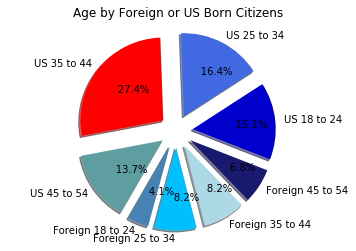

In [7]:
import matplotlib.pyplot as plt

# @hidden_cell
# Data to plot
labels = ['Foreign 18 to 24', 'Foreign 25 to 34', 'Foreign 35 to 44', 'Foreign 45 to 54',
          'US 18 to 24', 'US 25 to 34', 'US 35 to 44', 'US 45 to 54']
sizes = [3, 6, 6, 5, 11, 12, 20, 10]
colors = ['#4682B4', '#00BFFF', '#ADD8E6', '#191970','#0000CD', '#4169E1', '#FF0000', '#5F9EA0']
explode = (0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2)  # explode 1st slice

# Plot Pie Chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%10.1f%%', shadow=True, startangle=240)
plt.axis('equal')
plt.title('Age by Foreign or US Born Citizens')
plt.show()


## The US and Foreign-born workers meet or exceed the most productive working age of 37 for agriculture farm employees

## Health & Safety Data

In [8]:
# @hidden_cell
body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Large County of Homicide Crime in Keego Harbor.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_10 = pd.read_csv(body)
df_data_10.head()



,Year,Location,Homicide Rate
0,2015,"Oakland County, MI",4.0
1,2016,"Oakland County, MI",3.9
2,2017,"Oakland County, MI",3.4


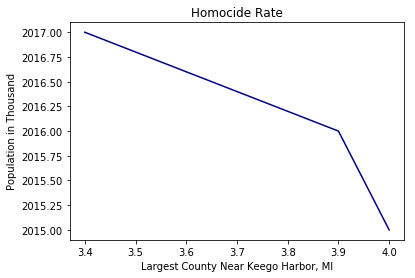

In [9]:
# @hidden_cell
Oakland_County = [3.4, 3.9, 4.0]
Year = [2017, 2016, 2015]

plt.plot(Oakland_County, Year, color='Navy')

plt.xlabel('Largest County Near Keego Harbor, MI')
plt.ylabel('Population in Thousand')
plt.title('Homocide Rate')
plt.show()

## There is a consistent drop in the homicide rate in the largest county near Keego Harbor,  MI between 2015 - 2017.

## Education (Irrelevant Data)

## Living Data

In [10]:
# @hidden_cell
body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Commute Time.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_5 = pd.read_csv(body)
df_data_5.head()

,Year,Location,Travel 10 to 14 Mins,Travel 20 to 24 Mins,Travel 30 to 34 Mins,Travel 45 to 59 Mins
0,2013,United States,19150700,19796400,18220900,10154500
1,2013,Keego Harbor,61,208,185,170
2,2014,United States,19118200,19975600,18463800,10409200
3,2014,Keego Harbor,106,219,243,155
4,2015,United States,19178600,20210800,18783100,10746800


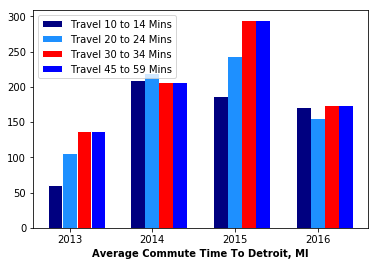

In [11]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# @hidden_cell
# set width of bar
barWidth = .17
 
# set height of bar
bars1 = [61, 208, 185, 170]
bars2 = [106, 219, 243, 155]
bars3 = [137, 206, 294, 173]
bars4 = [125, 272, 298, 148]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, bars1, color='#000080', width=barWidth, edgecolor='white', label='Travel 10 to 14 Mins')
plt.bar(r2, bars2, color='#1E90FF', width=barWidth, edgecolor='white', label='Travel 20 to 24 Mins')
plt.bar(r3, bars3, color='#FF0000', width=barWidth, edgecolor='white', label='Travel 30 to 34 Mins')
plt.bar(r4, bars3, color='#0000FF', width=barWidth, edgecolor='white', label='Travel 45 to 59 Mins')

# Add xticks on the middle of the group bars
plt.xlabel('Average Commute Time To Detroit, MI', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2013', '2014', '2015', '2016'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

## On average, a commuters travel time to Detroit MI is between 30 to 34 minutes.

## Living Data (#2)

In [12]:
# @hidden_cell
body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Transportation Type.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_9 = pd.read_csv(body)
df_data_9.head()

,Year,Location,Bicycle,Carpooled,Drove,Home,Motorcycle,Other,Bus,Ferry,Rail,Streetcar,Subway,Taxi,Walked,Workers,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,Unnamed: 122,Unnamed: 123,Unnamed: 124,Unnamed: 125,Unnamed: 126,Unnamed: 127,Unnamed: 128,Unnamed: 129,Unnamed: 130,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140,Unnamed: 141,Unnamed: 142,Unnamed: 143,Unnamed: 144,Unnamed: 145,Unnamed: 146,Unnamed: 147,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Unnamed: 191,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Unnamed: 204,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,2013,Keego Harbor,0,72,1139,32,0,11,0,0,0,0,0,0,51,1305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

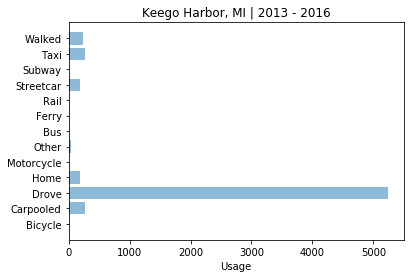

In [13]:
# @hidden_cell
objects = (('Bicycle', 'Carpooled', 'Drove', 'Home', 'Motorcycle', 'Other', 
            'Bus', 'Ferry', 'Rail', 'Streetcar', 'Subway', 'Taxi', 'Walked'))
y_pos = np.arange(len(objects))
performance = [0, 267, 5233, 183, 0, 37, 0, 0, 0, 183, 0, 267, 230]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Keego Harbor, MI | 2013 - 2016')
 
plt.show()

## Residents of Keego Harbor primary choice of transportation is driving a car.

In [14]:
# @hidden_cell
body = client_aae71b9bff024ad18b0f2243ce422e44.get_object(Bucket='capstoneproject-donotdelete-pr-upoppgqe59dxzd',Key='Location.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()

,Zip Codes,City,County,Latitude,Longitude
0,48320,Keego Harbor,"Oakland, MI",42.610918,-83.335967
1,48320,Sylvan Lake,"Oakland, MI",42.611400,83.328500


## FOURSQUARE API SEARCH in KEEGO HARBOR and DETROIT MI

## KEEGO HARBOR MICHIGAN

In [15]:
# @hidden_cell
CLIENT_ID='MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY' # your Foursquare ID
CLIENT_SECRET='MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ' # your Foursquare Secret
VERSION='20181206'
LIMIT=30
print('You are now linked to Foursquare')

You are now linked to Foursquare


In [16]:
# print out geograpical coordinate of Keego Harbor, MI 
address = 'Keego Harbor, MI'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Keego Harbor, MI are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Keego Harbor, MI are 42.6080884, -83.3438248.


In [17]:
search_query = 'Steakhouse'
radius = 1000
print(search_query + ' .... OK!')

Steakhouse .... OK!


In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY&client_secret=MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ&ll=42.6080884,-83.3438248&v=20181206&query=Steakhouse&radius=1000&limit=30'

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c681105351e3d13a7929b57'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/steakhouse_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1cc941735',
      'name': 'Steakhouse',
      'pluralName': 'Steakhouses',
      'primary': True,
      'shortName': 'Steakhouse'}],
    'hasPerk': False,
    'id': '4b79d7c5f964a520ae152fe3',
    'location': {'address': '3251 Orchard Lake Rd',
     'cc': 'US',
     'city': 'Keego Harbor',
     'country': 'United States',
     'distance': 695,
     'formattedAddress': ['3251 Orchard Lake Rd',
      'Keego Harbor, MI 48320',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.60290206351545,
       'lng': -83.34856300830377}],
     'lat': 42.60290206351545,
     'lng': -83.34856300830377,
     'postalCode': '48320',
     'state': 'MI'},
    'name': 'Harbor Steakhouse',
    'referralId': 'v-1550323973'}]}}

In [20]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

In [21]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Harbor Steakhouse,Steakhouse,3251 Orchard Lake Rd,US,Keego Harbor,United States,695,"[3251 Orchard Lake Rd, Keego Harbor, MI 48320,...","[{'lat': 42.60290206351545, 'label': 'display'...",42.602902,-83.348563,48320,MI,4b79d7c5f964a520ae152fe3


In [22]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a blue circle marker to represent the City of Keego Harbor
folium.features.CircleMarker(
    [latitude, longitude],
    radius=15,
    color='red',
    popup='City of Keego Harbor',
    fill = True,
    fill_color = 'Blue',
    fill_opacity = 0.6
).add_to(venues_map)

# add the Top Trending Retail Business as green circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=15,
        color='blue',
        popup='Top Trending Retail Business',
        fill = True,
        fill_color='Green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Blue Marker display Keego Harber | Red Marker Show Top Trending Business in Keego Harbor.

## Search for Businesses near the Top Trending Business in the Keego Harbor.

In [23]:
latitude = 42.6080884
longitude = -83.3438248

In [24]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY&client_secret=MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ&ll=42.6080884,-83.3438248&v=20181206&radius=1000&limit=30'

In [25]:
import requests

In [26]:
results = requests.get(url).json()
'There are {} around Harbor Steakhouse.'.format(len(results['response']['groups'][0]['items']))

'There are 30 around Harbor Steakhouse.'

In [27]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'reasonName': 'globalInteractionReason',
    'summary': 'This spot is popular',
    'type': 'general'}]},
 'referralId': 'e-0-4ad66a3ef964a520160721e3-0',
 'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/italian_',
     'suffix': '.png'},
    'id': '4bf58dd8d48988d110941735',
    'name': 'Italian Restaurant',
    'pluralName': 'Italian Restaurants',
    'primary': True,
    'shortName': 'Italian'}],
  'id': '4ad66a3ef964a520160721e3',
  'location': {'address': '1999 Cass Lake Rd',
   'cc': 'US',
   'city': 'Keego Harbor',
   'country': 'United States',
   'distance': 169,
   'formattedAddress': ['1999 Cass Lake Rd',
    'Keego Harbor, MI 48320',
    'United States'],
   'labeledLatLngs': [{'label': 'display',
     'lat': 42.60960293885856,
     'lng': -83.34406792186635}],
   'lat': 42.60960293885856,
   'lng': -83.34406792186635,
   'postalCode': '48320',
   'state': 'MI'},
  'name': "Gino's Pizzeria",
  '

In [28]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Gino's Pizzeria,Italian Restaurant,1999 Cass Lake Rd,US,Keego Harbor,United States,NaN,169,"[1999 Cass Lake Rd, Keego Harbor, MI 48320, Un...","[{'label': 'display', 'lat': 42.60960293885856...",42.609603,-83.344068,48320,MI,4ad66a3ef964a520160721e3
1,Yardbird,New American Restaurant,1978 Cass Lake Rd,US,Keego Harbor,United States,NaN,269,"[1978 Cass Lake Rd, Keego Harbor, MI 48320, Un...","[{'label': 'display', 'lat': 42.6104889978377,...",42.610489,-83.344219,48320,MI,53a33fcc498e192ea6fa2c63
2,Boskos Coffee & Kitchen,Coffee Shop,2850 Orchard Lake Rd,US,Keego Harbor,United States,Cass Lake,256,"[2850 Orchard Lake Rd (Cass Lake), Keego Harbo...","[{'label': 'display', 'lat': 42.60712193660984...",42.607122,-83.340987,48320,MI,5103e226e4b0ad7f32202628
3,The Lodge,Bar,2812 Orchard Lake Rd,US,Keego Harbor,United States,NaN,290,"[2812 Orchard Lake Rd, Keego Harbor, MI 48320,...","[{'label': 'display', 'lat': 42.6073443368133,...",42.607344,-83.340425,48320,MI,4a49760df964a5205fab1fe3
4,El Camino,Mexican Restaurant,NaN,US,Keego Harbor,United States,NaN,328,"[Keego Harbor, MI 48320, United States]","[{'label': 'display', 'lat': 42.606876, 'lng':...",42.606876,-83.340164,48320,MI,5805364638fa1f1622c1e508
5,Dairy Queen,Fast Food Restaurant,2886 Orchard Lake Rd,US,Keego Harbor,United States,Prynne,222,"[2886 Orchard Lake Rd (Prynne), Keego Harbor, ...","[{'label': 'display', 'lat': 42.60670405443324...",42.606704,-83.341868,48320,MI,4bba7fc5935e9521db402890
6,Ellen's Bakery & Cafe,Café,2495 Orchard Lake Rd,US,Sylvan Lake,United States,NaN,746,"[2495 Orchard Lake Rd, Sylvan Lake, MI 48320, ...","[{'label': 'display', 'lat': 42.60905967797983...",42.609060,-83.334811,48320,MI,4dcec234fa7664b7c6b02261
7,Hungry Howie's Pizza,Pizza Place,2170 Cass Lake Rd,US,Keego Harbor,United States,NaN,189,"[2170 Cass Lake Rd, Keego Harbor, MI 48320, Un...","[{'label': 'display', 'lat': 42.606406, 'lng':...",42.606406,-83.344208,48320,MI,4dc0775293a0c19bae5762d2
8,Harbor Steakhouse,Steakhouse,3251 Orchard Lake Rd,US,Keego Harbor,United States,NaN,695,"[3251 Orchard Lake Rd, Keego Harbor, MI 48320,...","[{'label': 'display', 'lat': 42.60290206351545...",42.602902,-83.348563,48320,MI,4b79d7c5f964a520ae152fe3
9,Salvation Army SATRUCK Thrift Store,Thrift / Vintage Store,3232 Orchard Lake Rd,US,Orchard Lake,United States,NaN,708,"[3232 Orchard Lake Rd, Orchard Lake, MI 48324,...","[{'label': 'display', 'lat': 42.6032874987744,...",42.603287,-83.349494,48324,MI,5057a6353d7c8376d00afbd4


In [29]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Harbor Steakhouse (Top Rated Businesses in Keego Harbor) as a Yellow circle marker
folium.features.CircleMarker(
    [latitude, longitude],
    radius=25,
    popup='Harbor Steakhouse',
    fill=True,
    color='Red',
    fill_color='Yellow',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers near Harbor Steakhouse
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        fill=True,
        color='Blue',
        fill_color='Green',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## There is limited to no competition for Cannabis retailers near the selected area Keego Harbor

## Detroit Michigan

In [30]:
CLIENT_ID='MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY' # your Foursquare ID
CLIENT_SECRET='MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ' # your Foursquare Secret
VERSION='20181206'
LIMIT=30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY
CLIENT_SECRET:MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ


In [31]:
# print out geograpical coordinate of Keego Harbor, MI 
address = 'Detroit, MI'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Detroit, Michigan are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Detroit, Michigan are 42.3315509, -83.0466403.


In [32]:
search_query = 'Market'
radius = 500
print(search_query + ' .... OK!')

Market .... OK!


In [33]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=MBDTMTD5HXHXSW12HGPK1I210GAFCVB5MCAZVVUJUA5EGVQY&client_secret=MZNUDVNY1MM42SYHHFPLAVATAWN3OAFSZVEATFNORKXJWSOZ&ll=42.3315509,-83.0466403&v=20181206&query=Market&radius=500&limit=30'

In [34]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c681108db04f505a62ab624'},
 'response': {'venues': [{'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/seafood_',
       'suffix': '.png'},
      'id': '4bf58dd8d48988d1ce941735',
      'name': 'Seafood Restaurant',
      'pluralName': 'Seafood Restaurants',
      'primary': True,
      'shortName': 'Seafood'}],
    'hasPerk': False,
    'id': '4c522ad1048b1b8de07e1b30',
    'location': {'address': '1435 Randolph St',
     'cc': 'US',
     'city': 'Detroit',
     'country': 'United States',
     'crossStreet': 'at Gratiot Ave.',
     'distance': 479,
     'formattedAddress': ['1435 Randolph St (at Gratiot Ave.)',
      'Detroit, MI 48226',
      'United States'],
     'labeledLatLngs': [{'label': 'display',
       'lat': 42.33581869155181,
       'lng': -83.0458241780056}],
     'lat': 42.33581869155181,
     'lng': -83.0458241780056,
     'postalCode': '48226',
     'state': 'MI'},
    'name': 'Detroit Seafood Market'

In [35]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe_dm = json_normalize(venues)

In [36]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe_dm.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe_dm.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Detroit Seafood Market,Seafood Restaurant,1435 Randolph St,US,Detroit,United States,at Gratiot Ave.,479,"[1435 Randolph St (at Gratiot Ave.), Detroit, ...","[{'lat': 42.33581869155181, 'label': 'display'...",42.335819,-83.045824,48226,MI,4c522ad1048b1b8de07e1b30
1,The Natural Market,Cosmetics Shop,204 E Grand River Ave,US,Detroit,United States,Broadway,452,"[204 E Grand River Ave (Broadway), Detroit, MI...","[{'lat': 42.33561364047969, 'label': 'display'...",42.335614,-83.046686,48226,MI,4fcf8c75e4b071a2c8c872c0
2,Detroit Seafood Market,Seafood Restaurant,1435 Randolph St,US,Detroit,United States,Centre,485,"[1435 Randolph St (Centre), Detroit, MI 48226,...","[{'lat': 42.335875508745765, 'label': 'display...",42.335876,-83.045908,48226,MI,4cae4091562d224b30a50488
3,Motor City Street Eats FOOD TRUCKS @ Rust Belt...,Food Truck,Woodward,US,Ferndale,United States,9 Mile,134,"[Woodward (9 Mile), Ferndale, MI 48220, United...","[{'lat': 42.332693451707875, 'label': 'display...",42.332693,-83.046099,48220,MI,51858a5a498ee41631a13412
4,City Market,Food & Drink Shop,575 Brush St,US,Detroit,United States,Congress/Jefferson,395,"[575 Brush St (Congress/Jefferson), Detroit, M...","[{'lat': 42.33164224128251, 'label': 'display'...",42.331642,-83.041839,48226,MI,535d3fe7498ea00375053a87
5,Carnival Market,Mexican Restaurant,NaN,US,Detroit,United States,NaN,99,"[Detroit, MI 48226, United States]","[{'lat': 42.330748833495036, 'label': 'display...",42.330749,-83.047174,48226,MI,50f44a57e4b0e93662ecd8a3
6,Eastern Market Farm Stand,Food & Drink Shop,355 Fisher Rd,US,Detroit,United States,NaN,268,"[355 Fisher Rd, Detroit, MI 48226, United States]","[{'lat': 42.33395038143229, 'label': 'display'...",42.333950,-83.046345,48226,MI,4fe34170e4b019c9a5fcf2a4
7,Detroit Seafood Market,Seafood Restaurant,1435 Randolph St,US,Detroit,United States,NaN,483,"[1435 Randolph St, Detroit, MI 48226, United S...","[{'lat': 42.335861, 'label': 'display', 'lng':...",42.335861,-83.045918,48226,MI,5744e9d4498eda26071aa490
8,Detroit Fish Market,Food,1435 Randolph St,US,Detroit,United States,NaN,479,"[1435 Randolph St, Detroit, MI 48226, United S...","[{'lat': 42.335806, 'label': 'display', 'lng':...",42.335806,-83.045732,48226,MI,4f3261c319836c91c7d24876
9,Marketplace @ Compuware,Food Court,NaN,US,Detroit,United States,NaN,41,"[Detroit, MI 48226, United States]","[{'lat': 42.331925274468645, 'label': 'display...",42.331925,-83.046626,48226,MI,4efb19f829c268318caaaef5


In [37]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=16) # generate map centred around the Conrad Hotel

# add Market Center as Red circle marker to represent a highly pop. area
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='Red',
    popup='Detroit',
    fill = True,
    fill_color = 'Yellow',
    fill_opacity = 0.6
).add_to(venues_map)

# add Top Rated Businesses as Green circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=10,
        color='blue',
        popup=label,
        fill = True,
        fill_color='Green',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## There is limited to no competition for Cannabis retailers near the selected area (Detroit)